# Lab 5: K-Means Algorithm
- References
    - https://en.wikipedia.org/wiki/K-means_clustering

## Data Generation

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
      'figure.figsize': (5, 5),
      "figure.autolayout": True,
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'x-large',
      'ytick.labelsize': 'x-large',
      'lines.linewidth': 4}

plt.rcParams.update(params)
%matplotlib inline

In [308]:
def make_one_group(size, mean = 0, std = 1):
    return np.random.normal(size = (size, 2), loc = mean, scale = np.abs(std))

def make_N_groups(size, N = 1):

    output = np.zeros((size, 3))
    group_size = int(np.round(size / N))
    idx = 0
    for i in range(N - 1):
        output[idx : idx + group_size, 0] = int(i)
        output[idx : idx + group_size, 1 : 3] = make_one_group(group_size, np.random.normal(size = 1, loc = 0, scale = 2), np.random.normal(size = 1))
        idx += group_size
    output[idx : size, 0] = int(N - 1)
    output[idx : size, 1 : 3] = make_one_group(size - idx, np.random.normal(size = 1, loc = 0, scale = 2), np.random.normal(size = 1))
    return output

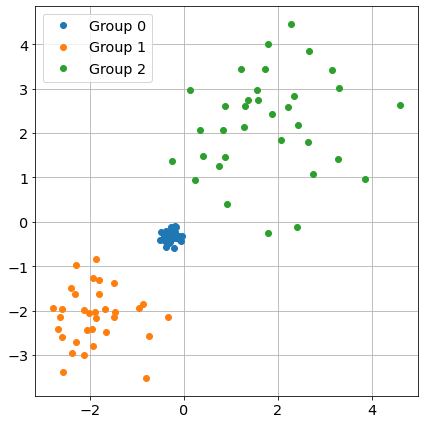

In [309]:
np.random.seed(3033)

types = 3
data_size = 100
data = make_N_groups(data_size, types)

plt.figure(figsize = (6, 6))
for i in range(types):
    mask = data[:, 0] == i
    plt.plot(data[mask, 1], data[mask, 2], "o")
plt.grid(True)
plt.legend(["Group {0}".format(i) for i in range(types)])

In [310]:
tbl = pd.DataFrame(data[:, 1:3])
tbl.columns = ["X", "Y"]
tbl

,X,Y
0,-0.087509,-0.412195
1,-0.171471,-0.115849
2,-0.166024,-0.312749
3,-0.375249,-0.352101
4,-0.375646,-0.350197
...,...,...
95,1.866714,2.420604
96,0.136387,2.973146
97,1.575202,2.748575
98,3.295256,3.010458


## K-Means Algorithm

### Step 1: Centers of 1st Generation

In [311]:
num_group_centers = 3
centers = tbl.loc[np.random.choice(tbl.shape[0], num_group_centers)]
centers.reset_index(inplace = True)
centers = centers[["X", "Y"]]
centers

,X,Y
0,-0.102796,-0.315572
1,-2.673655,-2.406638
2,-0.269759,-0.266819


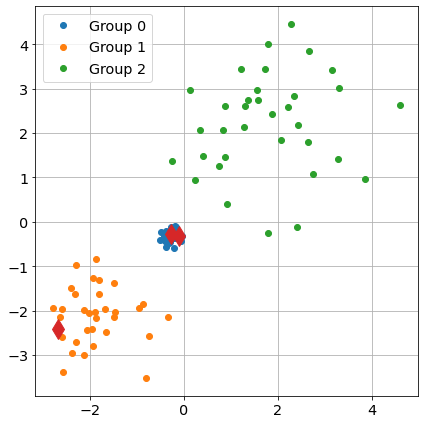

In [312]:
plt.figure(figsize = (6, 6))
for i in range(types):
    mask = data[:, 0] == i
    plt.plot(data[mask, 1], data[mask, 2], "o")
plt.grid(True)
plt.legend(["Group {0}".format(i) for i in range(types)])

plt.plot(centers["X"], centers["Y"], "d", ms = 14)

### Step 2: Categorizing Data by Distance

In [313]:
tbl2 = tbl
tbl2["ID"] = None
tbl2

,X,Y,ID
0,-0.087509,-0.412195,None
1,-0.171471,-0.115849,None
2,-0.166024,-0.312749,None
3,-0.375249,-0.352101,None
4,-0.375646,-0.350197,None
...,...,...,...
95,1.866714,2.420604,None
96,0.136387,2.973146,None
97,1.575202,2.748575,None
98,3.295256,3.010458,None


In [314]:
for i in range(centers.shape[0]):
    tbl2["C{0}".format(i)] = np.sqrt((tbl2["X"] - centers.loc[i]["X"]) ** 2 + (tbl2["Y"] - centers.loc[i]["Y"]) ** 2)
tbl2

,X,Y,ID,C0,C1,C2
0,-0.087509,-0.412195,None,0.097825,3.265877,0.233129
1,-0.171471,-0.115849,None,0.211200,3.392438,0.180146
2,-0.166024,-0.312749,None,0.063291,3.266892,0.113448
3,-0.375249,-0.352101,None,0.274891,3.082821,0.135651
4,-0.375646,-0.350197,None,0.275038,3.083795,0.134773
...,...,...,...,...,...,...
95,1.866714,2.420604,None,3.371295,6.627006,3.433185
96,0.136387,2.973146,None,3.297404,6.069465,3.265322
97,1.575202,2.748575,None,3.493518,6.680494,3.535036
98,3.295256,3.010458,None,4.754916,8.060572,4.842507


In [315]:
tbl2["ID"] = tbl2.iloc[:, -3:].idxmin(axis = 1).apply(lambda x : int(x[1:]))
tbl2

,X,Y,ID,C0,C1,C2
0,-0.087509,-0.412195,0,0.097825,3.265877,0.233129
1,-0.171471,-0.115849,2,0.211200,3.392438,0.180146
2,-0.166024,-0.312749,0,0.063291,3.266892,0.113448
3,-0.375249,-0.352101,2,0.274891,3.082821,0.135651
4,-0.375646,-0.350197,2,0.275038,3.083795,0.134773
...,...,...,...,...,...,...
95,1.866714,2.420604,0,3.371295,6.627006,3.433185
96,0.136387,2.973146,2,3.297404,6.069465,3.265322
97,1.575202,2.748575,0,3.493518,6.680494,3.535036
98,3.295256,3.010458,0,4.754916,8.060572,4.842507


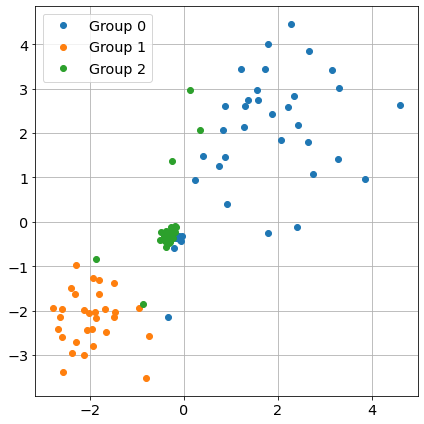

In [316]:
plt.figure(figsize = (6, 6))
for i in range(types):
    mask = tbl2["ID"] == i
    plt.plot(tbl2["X"][mask], tbl2["Y"][mask], "o")
plt.grid(True)
plt.legend(["Group {0}".format(i) for i in range(types)])

### Step 3: Go Back to Step 1 Unless No One Changes Its ID

In [317]:
for i in range(types):
    mask = tbl2["ID"] == i
    centers["X"][i] = tbl2["X"][mask].mean()
    centers["Y"][i] = tbl2["Y"][mask].mean()
centers

,X,Y
0,1.474241,1.581167
1,-1.976757,-2.173929
2,-0.355106,-0.136001


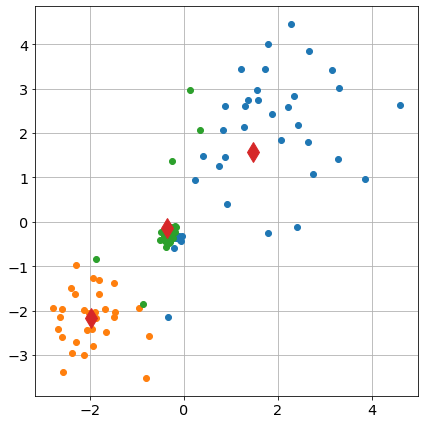

In [318]:
plt.figure(figsize = (6, 6))
for i in range(types):
    mask = tbl2["ID"] == i
    plt.plot(tbl2["X"][mask], tbl2["Y"][mask], "o")
plt.grid(True)
plt.plot(centers["X"], centers["Y"], "d", ms = 14)

In [319]:
for i in range(centers.shape[0]):
    tbl2["C{0}".format(i)] = np.sqrt((tbl2["X"] - centers.loc[i]["X"]) ** 2 + (tbl2["Y"] - centers.loc[i]["Y"]) ** 2)
tbl2

,X,Y,ID,C0,C1,C2
0,-0.087509,-0.412195,0,2.532302,2.583208,0.384566
1,-0.171471,-0.115849,2,2.363944,2.737654,0.184737
2,-0.166024,-0.312749,0,2.505472,2.596679,0.258828
3,-0.375249,-0.352101,2,2.675470,2.425671,0.217037
4,-0.375646,-0.350197,2,2.674369,2.426841,0.215178
...,...,...,...,...,...,...
95,1.866714,2.420604,0,0.926655,5.990159,3.387140
96,0.136387,2.973146,2,1.930662,5.563969,3.147755
97,1.575202,2.748575,0,1.171765,6.070210,3.470859
98,3.295256,3.010458,0,2.314944,7.394050,4.819268


In [320]:
changed = np.any(tbl2["ID"] - tbl2.iloc[:, -3:].idxmin(axis = 1).apply(lambda x : int(x[1:])) != 0)
changed

True

### Step 4: Put It Together

Text(0.5, 1.0, 'Iterations: 4')

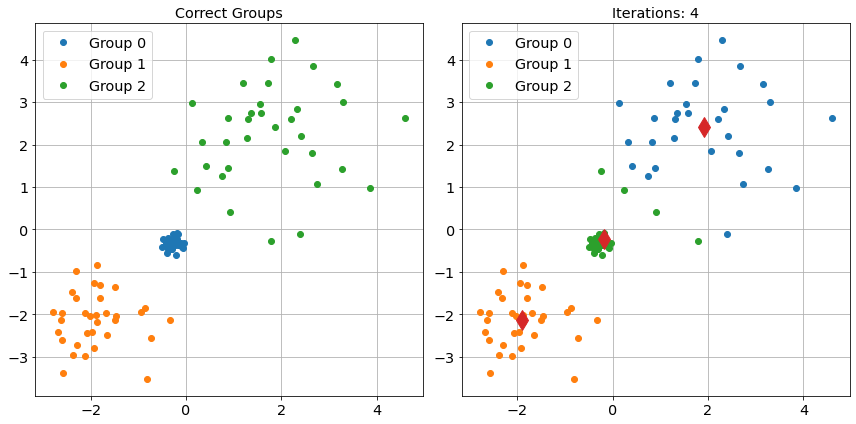

In [321]:
iterations = 1
while changed:

    for i in range(types):
        mask = tbl2["ID"] == i
        centers["X"][i] = tbl2["X"][mask].mean()
        centers["Y"][i] = tbl2["Y"][mask].mean()

    for i in range(centers.shape[0]):
        tbl2["C{0}".format(i)] = np.sqrt((tbl2["X"] - centers.loc[i]["X"]) ** 2 + (tbl2["Y"] - centers.loc[i]["Y"]) ** 2)
    changed = np.any(tbl2["ID"] - tbl2.iloc[:, -3:].idxmin(axis = 1).apply(lambda x : int(x[1:])) != 0)
    tbl2["ID"] = tbl2.iloc[:, -3:].idxmin(axis = 1).apply(lambda x : int(x[1:]))
    iterations += 1

plt.figure(figsize = (12, 6))
plt.subplot(121)
for i in range(types):
    mask = data[:, 0] == i
    plt.plot(data[mask, 1], data[mask, 2], "o")
plt.grid(True)
plt.legend(["Group {0}".format(i) for i in range(types)])
plt.title("Correct Groups")

plt.subplot(122)
for i in range(types):
    mask = tbl2["ID"] == i
    plt.plot(tbl2["X"][mask], tbl2["Y"][mask], "o")
plt.grid(True)
plt.plot(centers["X"], centers["Y"], "d", ms = 14)
plt.legend(["Group {0}".format(i) for i in range(types)])
plt.title("Iterations: {0}".format(iterations))

## Benchmark
- References
    - https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html

In [322]:
from sklearn.cluster import MiniBatchKMeans

X = data[:, 1:]
model = MiniBatchKMeans(3)
model.fit(X)
labels = model.predict(X)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Text(0.5, 1.0, 'Mini-Batch KMeans')

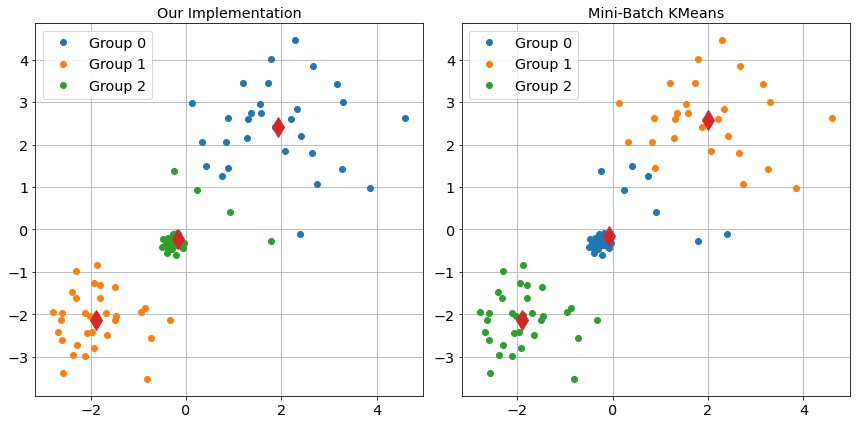

In [323]:
plt.figure(figsize = (12, 6))
plt.subplot(121)
for i in range(types):
    mask = tbl2["ID"] == i
    plt.plot(tbl2["X"][mask], tbl2["Y"][mask], "o")
plt.grid(True)
plt.plot(centers["X"], centers["Y"], "d", ms = 14)
plt.legend(["Group {0}".format(i) for i in range(types)])
plt.title("Our Implementation")

plt.subplot(122)
for i in range(types):
    mask = labels == i
    plt.plot(tbl2["X"][mask], tbl2["Y"][mask], "o")
plt.grid(True)
for i in range(types):
    mask = labels == i
    centers["X"][i] = tbl2["X"][mask].mean()
    centers["Y"][i] = tbl2["Y"][mask].mean()
centers
plt.plot(centers["X"], centers["Y"], "d", ms = 14)
plt.legend(["Group {0}".format(i) for i in range(types)])
plt.title("Mini-Batch KMeans")